Consider two repressilator systems. The function is given by
$$\frac{dx}{dt}=\sigma_1\frac{y^n}{1+y^n}\cdot\beta\frac{1}{1+x_2^n}-dx$$
$$\frac{dx_1}{dt}=\beta\frac{1}{1+x^n}-dx_1$$
$$\frac{dx_2}{dt}=\beta\frac{1}{1+x_1^n}-dx_2$$
$$\frac{dy}{dt}=\beta\frac{1}{1+y_2^n}-dy$$
$$\frac{dy_1}{dt}=\sigma_2\frac{x^n}{1+x^n}\cdot\beta\frac{1}{1+y^n}-dy_1$$
$$\frac{dy_2}{dt}=\beta\frac{1}{1+y_1^n}-dy_2$$

In [43]:
import numpy as np
import scipy.integrate as ode
import random as rd
import os
import time
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.colorbar as mcolorbar
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib import gridspec

import use_function as f

# ODE function
def couple_repmul_repmul(t,z):
    x,x1,x2,y,y1,y2=z
    dxdt=sigma1/(1+y**n)*beta/(1+(x2**n)) - d*x
    dx1dt=beta/(1+(x**n)) - d*x1
    dx2dt=beta/(1+(x1**n)) - d*x2
    dydt=beta/(1+(y2**n)) - d*y
    dy1dt=sigma2/(1+x**n)*beta/(1+(y**n)) - d*y1
    dy2dt=beta/(1+(y1**n)) - d*y2
    return [dxdt,dx1dt,dx2dt,dydt,dy1dt,dy2dt]
def couple_actmul_actmul(t,z):
    x,x1,x2,y,y1,y2=z
    dxdt=sigma1*y**n/(1+y**n)+beta/(1+(x2**n)) - d*x
    dx1dt=beta/(1+(x**n)) - d*x1
    dx2dt=beta/(1+(x1**n)) - d*x2
    dydt=beta/(1+(y2**n)) - d*y
    dy1dt=sigma2*x**n/(1+x**n)+beta/(1+(y**n)) - d*y1
    dy2dt=beta/(1+(y1**n)) - d*y2
    return [dxdt,dx1dt,dx2dt,dydt,dy1dt,dy2dt]

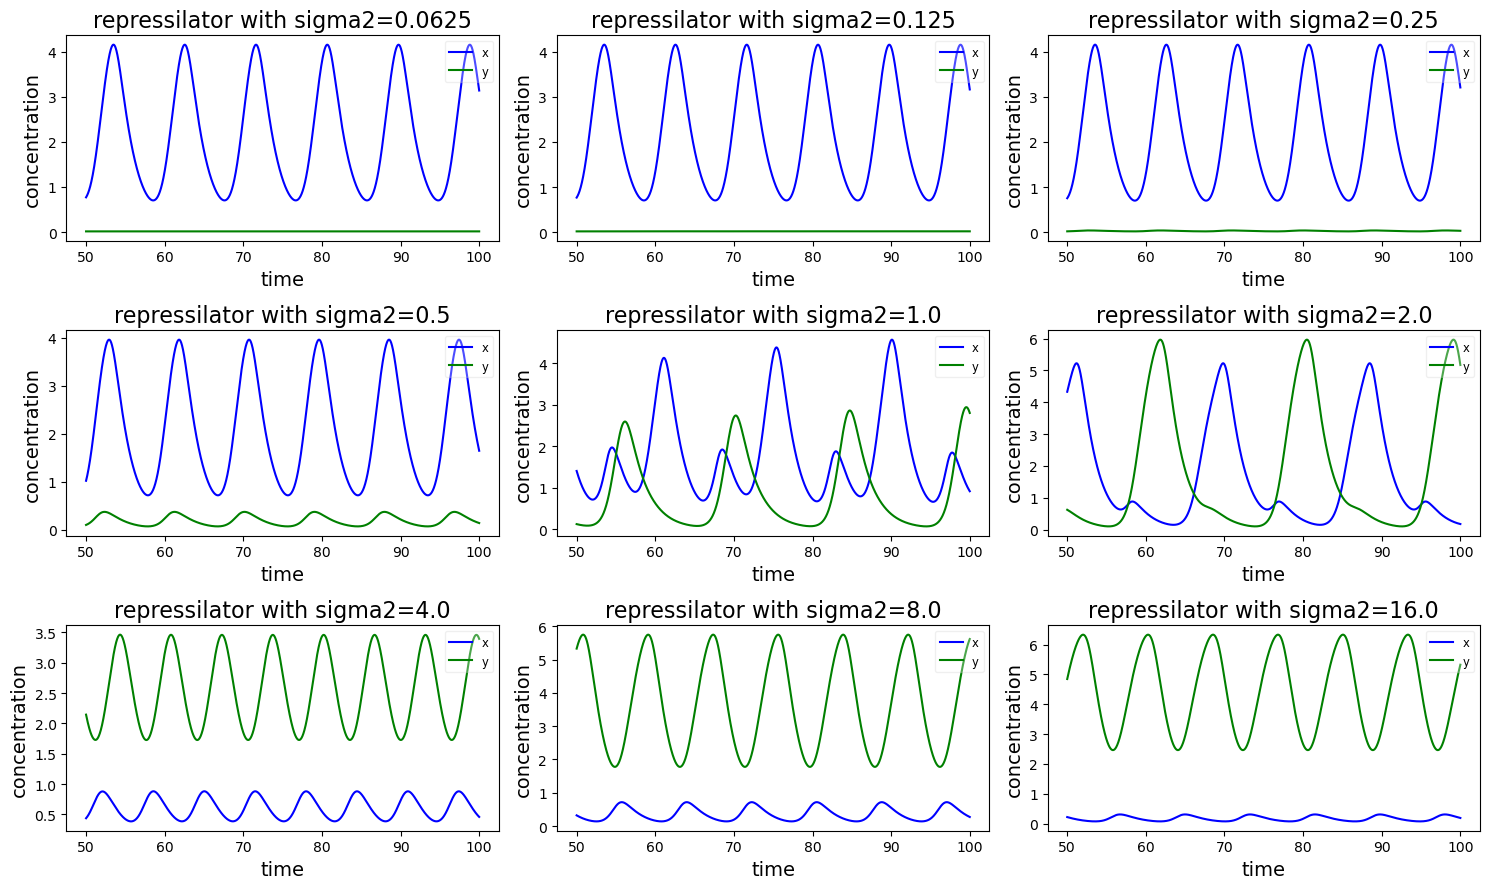

In [ ]:
simu_time=100
start_sampling_time=50
timespan=(0,simu_time)
z0=[1.5,0,0,0,1.5,0]  # initial condition

# parameters
n=3         # hill coef
d=0.5       # repressilator degradation
sigma=1     # transcription regulation of x
beta=4      # hill constant

sigma_span=np.zeros(9)
sigma_span[4]=sigma
for i in range(0,4):
    sigma_span[i]=sigma/(2**(4-i))
for i in range(5,9):
    sigma_span[i]=sigma*(2**(i-4))


results:list[any]=[None]*9
plt.figure(figsize=(15, 9))
for i in range(0,9):
    sigma1=sigma
    sigma2=sigma_span[i]
    results[i]=ode.solve_ivp(couple_repmul_repmul, timespan, z0, t_eval=np.linspace(start_sampling_time,simu_time,(simu_time-start_sampling_time)*100+1), method='RK45', rtol=1e-6, atol=1e-9)
    plt.subplot(3, 3, i+1)
    plt.plot(results[i].t, results[i].y[0], label='x', color='blue', linestyle='-')  # 蓝色实线
    plt.plot(results[i].t, results[i].y[3], label='y', color='green', linestyle='-')  # 绿色点划线
    plt.title('repressilator with sigma2='+str(sigma_span[i]), fontsize=16)
    plt.xlabel('time', fontsize=14)
    plt.ylabel('concentration', fontsize=14)
    plt.legend(loc='upper right',fontsize='small',framealpha=0.3)

plt.tight_layout()
plt.show()